In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pdb
from IPython.display import display
import os
import seaborn as sns
import statsmodels.formula.api as sm
from numpy.polynomial.polynomial import polyfit
from sklearn.model_selection import train_test_split
import sklearn
from math import sqrt
import glob

1294.368


,Year,Month,Day,Site,Zone,Plot,Location,Flag_Location,Location_Notes,Longitude,Flag_Longitude,Latitude,Flag_Latitude,Quadrat_Area,Species_Code,Shoot_Height,Flowering_Status,Plant_Biomass,Flag_Quadrat_Area,Date
0,2000,10,11,1,1,1,GCE1_CB1,NaN,NaN,-81.422539,NaN,31.538627,NaN,0.2500,A1,110.0,0.0,21.016,NaN,2000-10-11
1,2000,10,11,1,1,1,GCE1_CB1,NaN,NaN,-81.422539,NaN,31.538627,NaN,0.2500,A1,110.0,0.0,21.016,NaN,2000-10-11
2,2000,10,11,1,1,1,GCE1_CB1,NaN,NaN,-81.422539,NaN,31.538627,NaN,0.2500,A1,80.0,0.0,11.824,NaN,2000-10-11
3,2000,10,11,1,1,1,GCE1_CB1,NaN,NaN,-81.422539,NaN,31.538627,NaN,0.2500,A1,90.0,0.0,14.628,NaN,2000-10-11
4,2000,10,11,1,1,1,GCE1_CB1,NaN,NaN,-81.422539,NaN,31.538627,NaN,0.2500,A1,140.0,1.0,46.288,NaN,2000-10-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62345,2019,10,5,10,3,8,GCE10_JN8,NaN,NaN,-81.270693,NaN,31.477636,NaN,0.0625,A3,120.0,NaN,36.176,NaN,2019-10-05
62346,2019,10,5,10,3,8,GCE10_JN8,NaN,NaN,-81.270693,NaN,31.477636,NaN,0.0625,A3,100.0,NaN,27.824,NaN,2019-10-05
62347,2019,10,5,10,3,8,GCE10_JN8,NaN,NaN,-81.270693,NaN,31.477636,NaN,0.0625,A3,125.0,NaN,38.368,NaN,2019-10-05
62348,2019,10,5,10,3,8,GCE10_JN8,NaN,NaN,-81.270693,NaN,31.477636,NaN,0.0625,A3,85.0,NaN,22.016,NaN,2019-10-05


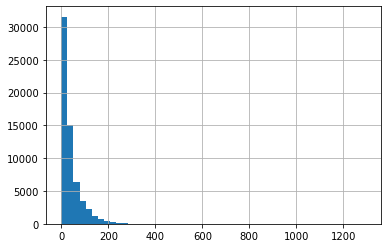

In [2]:
##import and concatenate datasets
##Mac:
# path = r'/Users/asariversjulien/Documents/Data/CSV files/Pennings'
# all_files = glob.glob(path + "/*.csv")

# li = []

# for filename in all_files:
#     df = pd.read_csv(filename, index_col=None, header=0)
#     li.append(df)

# df = pd.concat(li, axis=0, ignore_index=True)

##PC:
path = r'C:/Users/arj26323/Documents/Data/Biomass datasets/Pennings' 
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)

##Begin:
df['Plant_Biomass'] = df['Plant_Biomass']/df['Quadrat_Area'] ##adjust to grams/m^2

df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

# df = df[df['Species_Code'] == 'A1'] ##Remove all non-Spartina alterniflora plots - messes up unique coordinates section

df = df[df['Zone'] >= 0] ##Zone "-1" in 2013 needs to be addressed - refers to old plot location that was relocated

df['Plant_Biomass'].hist(bins = 50)
print(max(df['Plant_Biomass']))
df

     Year  Month  Day  Site  Zone Species_Code  Shoot_Height  \
0    2002     10   16     1     1           A1           140   
1    2002     10   16     1     1           A1            99   
2    2002     10   16     1     1           A1           185   
3    2002     10   16     1     1           A1            70   
4    2002     10   16     1     1           A1           133   
..    ...    ...  ...   ...   ...          ...           ...   
962  2002     10   20    10     2           A1            59   
963  2002     10   20    10     2           A1            22   
964  2002     10   20    10     2           A1            39   
965  2002     10   20    10     2           A1            25   
966  2002     10   20    10     2           A1            42   

     Flowering_Status  Leaf_Count  Plant_Mass  
0                 0.0        11.0        11.7  
1                 0.0        10.0         5.3  
2                 1.0        12.0        20.3  
3                 0.0         8.0      

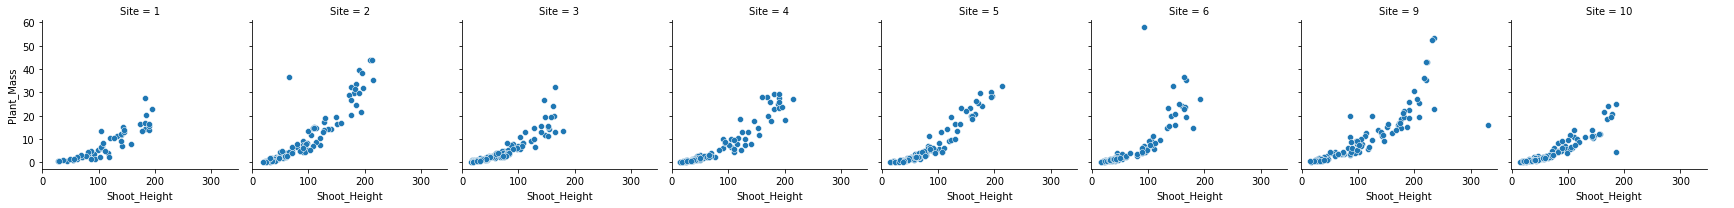

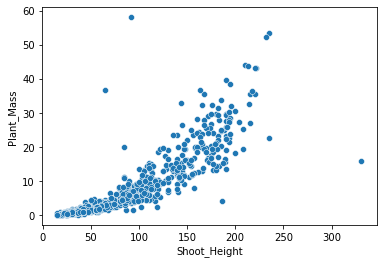

In [3]:
##Allometry data - the plant height/biomass relationship
allom_df = pd.read_csv('C:/Users/arj26323/Documents/Data/Biomass datasets/Pennings/Original data/Pennings_Allometry.csv', \
                       skiprows = [0,1,3,4])
allom_df = allom_df[allom_df['Species_Code'] == 'A1'] ##Remove all non-Spartina alterniflora plots; N now is 757 (not 1139)

print(allom_df)
print(len(allom_df['Plant_Mass']))


g = sns.FacetGrid(allom_df, col = 'Site')
g = (g.map(sns.scatterplot, 'Shoot_Height', 'Plant_Mass').add_legend())
plt.show()

g2 = sns.scatterplot(x = 'Shoot_Height', y = 'Plant_Mass', data = allom_df)
plt.show()
##equation for relationship: ln(Biomass) = constant + htslope*ln(Plant_Height) + flslope*ln(Flowering_Status)
##this equation changes between sites, species, and years; see metadata (search 'allom' until you find it)
##Spartina alterniflora (A1) only done in 2002


In [19]:
#df['Plant_Biomass'].hist(by=df['Year'])

df2 = df.groupby(['Plot', 'Zone', 'Site', 'Year'], as_index = False).aggregate({'Plant_Biomass':[np.mean, np.size, np.std], \
    'Longitude':'first', 'Latitude':'first', 'Quadrat_Area':'first', 'Species_Code':'first', 'Flowering_Status':'first', \
    'Date':'first'})

df2.columns = ['Plot','Zone','Site','Year','Mean_Biomass', 'Sample_Size', 'Std_Biomass', 'Longitude', 'Latitude', \
               'Quadrat_Area', 'Species_Code','Flowering_Status', 'Date']

df2['SE_Biomass'] = df2['Std_Biomass']/np.sqrt(df2['Sample_Size'])

df2

# df3 = df.groupby(['Plot', 'Zone', 'Site', 'Year'], as_index = False).mean()
# site_list = [7]
# df4 = df[df['Site'].isin(site_list)]
##site 7 seems to have the highest biomass
# list(df2) ##need to rename columns

,Plot,Zone,Site,Year,Mean_Biomass,Sample_Size,Std_Biomass,Longitude,Latitude,Quadrat_Area,Species_Code,Flowering_Status,Date,SE_Biomass
0,1,1,1,2000,22.448870,23,14.810154,-81.422539,31.538627,0.25,A1,0.0,2000-10-11,3.088131
1,1,1,1,2001,23.578667,18,14.448918,-81.422539,31.538627,0.25,A1,1.0,2001-10-17,3.405643
2,1,1,1,2002,16.236500,16,17.281629,-81.422539,31.538627,0.25,A1,0.0,2002-10-16,4.320407
3,1,1,1,2004,24.240667,18,6.073587,-81.422539,31.538627,0.25,A1,0.0,2004-10-25,1.431558
4,1,1,1,2005,25.972000,25,17.782706,-81.422539,31.538627,0.25,A1,0.0,2005-10-24,3.556541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,64,1,6,2018,53.934933,15,25.034443,-81.279858,31.388000,0.25,A1,0.0,2018-10-12,6.463865
3212,64,1,6,2019,36.954500,8,16.904829,-81.279858,31.388000,0.25,A1,0.0,2019-10-09,5.976760
3213,65,1,1,2017,23.865538,26,17.260079,-81.422320,31.538420,0.25,A1,1.0,2017-10-14,3.384980
3214,65,1,1,2018,13.833800,20,4.350498,-81.422320,31.538420,0.25,A1,0.0,2018-10-13,0.972801


In [5]:
dfx = df.groupby(['Site'], as_index = False).mean()
dfx = dfx[['Site', 'Longitude', 'Latitude']]
dfx
##lat/lon - these average lat/longs are used in GEE script! They are the points used in analysis. Lats/longs for \
##individual plots are shown in the df_plots dataframe below

,Site,Longitude,Latitude
0,1,-81.422318,31.539096
1,2,-81.295564,31.535967
2,3,-81.229141,31.518847
3,4,-81.365805,31.451791
4,5,-81.340722,31.435814
5,6,-81.280011,31.387962
6,7,-81.478498,31.334813
7,8,-81.415535,31.308242
8,9,-81.333707,31.351518
9,10,-81.270863,31.476948


In [6]:
##All coordinates (does not work if df is filtered to only Spartina alterniflora)
# longx = df['Longitude'].unique()
# latx = df['Latitude'].unique()

# unique_coordinates = pd.DataFrame(latx, longx)

# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     print(unique_coordinates)

In [7]:
##Unique values for dates - match with imagery in GEE
print(df['Year'].unique())
df_z = df.groupby('Year')['Day'].unique()

print(df_z)

##Locations of each plot, for each zone/site, on each sampling date
lat_x = df.groupby(['Year','Day', 'Site', 'Zone', 'Plot'], as_index=False)['Latitude'].mean()
# print(lat_x)

long_x = df.groupby(['Year','Day', 'Site', 'Zone', 'Plot'], as_index=False)['Longitude'].mean()
# print(long_x)

df_plots = pd.merge(lat_x, long_x)
print(df_plots) ##there is a better way of doing this than averaging - can you confirm?

##Export df_plots as CSV file - to then load in GEE-GA file
in_fc = df_plots
out_dir = os.path.expanduser('~/Documents/Data/Biomass datasets/Sapelo')
out_csv = os.path.join(out_dir, 'GA_allplots.csv')
# df_plots.to_csv(out_csv, index = False)

[2000 2001 2002 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 2015 2016 2017 2018 2019]
Year
2000    [11, 18, 10, 12, 13, 17, 16]
2001           [17, 15, 16, 8, 5, 9]
2002    [16, 18, 20, 15, 19, 14, 17]
2004                [25, 22, 24, 23]
2005        [24, 27, 22, 26, 21, 23]
2006                [16, 17, 15, 14]
2007            [22, 23, 24, 21, 20]
2008                [27, 28, 26, 25]
2009                [16, 15, 17, 14]
2010                [19, 20, 21, 18]
2011                [25, 27, 24, 26]
2012                [13, 14, 15, 12]
2013            [16, 18, 13, 15, 14]
2014        [17, 16, 18, 20, 21, 15]
2015    [20, 22, 25, 21, 15, 23, 24]
2016            [26, 25, 23, 24, 27]
2017        [14, 18, 19, 23, 16, 20]
2018    [13, 17, 14, 19, 12, 15, 16]
2019             [4, 11, 9, 8, 7, 5]
Name: Day, dtype: object
      Year  Day  Site  Zone  Plot   Latitude  Longitude
0     2000   10     4     1     1  31.451676 -81.365498
1     2000   10     4     1     2  31.451548 -81.365560
2

<AxesSubplot:xlabel='Date', ylabel='Plant_Biomass'>

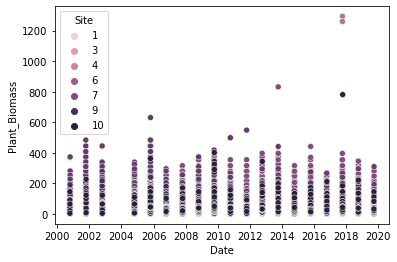

In [8]:
sns.scatterplot( x = 'Date', y = 'Plant_Biomass', hue = 'Site', data = df)

In [8]:
##Exporting coordinates

out_dir = os.path.expanduser('~/Downloads')
out_csv = os.path.join(out_dir, 'plotcoord.csv')

#df_plots.to_csv(out_csv)

In [ ]:
##Average biomass and standard deviation, grouped by plot: same as df2
